In [2]:
!pip install perceval-quandela

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.8 MB/s eta 0:00:00


In [3]:
from perceval.components.unitary_components import PS, BS, PERM
import perceval as pcvl
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

In [4]:
# define our generator class
class Generator:
 def __init__(self, n):
   self.n = n


 def create(self):
   qc = pcvl.Circuit(self.n, name = "Generator")
   qc.add(1, PS(phi=pcvl.P('gen_phi_1')))
   qc.add(2, PS(phi=pcvl.P('gen_phi_2')))
   qc.add(3, PS(phi=pcvl.P('gen_phi_3')))


   # mzi
   qc.add(0, BS(theta=pcvl.P('gen_theta_1'))).add(0, PS(phi=pcvl.P('gen_phi_4'))).add(0, BS(theta=pcvl.P('gen_theta_2')))
   qc.add(2, BS(theta=pcvl.P('gen_theta_3'))).add(2, PS(phi=pcvl.P('gen_phi_5'))).add(2, BS(theta=pcvl.P('gen_theta_4')))


   qc.add(1, PS(phi=pcvl.P('gen_phi_6')))
   qc.add(1, BS(theta=pcvl.P('gen_theta_5'))).add(1, PS(phi=pcvl.P('gen_phi_7'))).add(1, BS(theta=pcvl.P('gen_theta_6')))


   qc.add(0, BS(theta=pcvl.P('gen_theta_7'))).add(0, PS(phi=pcvl.P('gen_phi_8'))).add(0, BS(theta=pcvl.P('gen_theta_8')))
   qc.add(2, BS(theta=pcvl.P('gen_theta_9'))).add(2, PS(phi=pcvl.P('gen_phi_9'))).add(2, BS(theta=pcvl.P('gen_theta_10')))


   qc.add(0, PS(phi=pcvl.P('gen_phi_10')))
   qc.add(1, PS(phi=pcvl.P('gen_phi_11')))
   qc.add(2, PS(phi=pcvl.P('gen_phi_12')))


   # ----
   qc.add(1+4, PS(phi=pcvl.P('gen_phi_13')))
   qc.add(2+4, PS(phi=pcvl.P('gen_phi_14')))
   qc.add(3+4, PS(phi=pcvl.P('gen_phi_15')))


   # mzi
   qc.add(0+4, BS(theta=pcvl.P('gen_theta_11'))).add(0+4, PS(phi=pcvl.P('gen_phi_16'))).add(0+4, BS(theta=pcvl.P('gen_theta_12')))
   qc.add(2+4, BS(theta=pcvl.P('gen_theta_13'))).add(2+4, PS(phi=pcvl.P('gen_phi_17'))).add(2+4, BS(theta=pcvl.P('gen_theta_14')))


   qc.add(1+4, PS(phi=pcvl.P('gen_phi_18')))
   qc.add(1+4, BS(theta=pcvl.P('gen_theta_15'))).add(1+4, PS(phi=pcvl.P('gen_phi_19'))).add(1+4, BS(theta=pcvl.P('gen_theta_16')))


   qc.add(0+4, BS(theta=pcvl.P('gen_theta_17'))).add(0+4, PS(phi=pcvl.P('gen_phi_20'))).add(0+4, BS(theta=pcvl.P('gen_theta_18')))
   qc.add(2+4, BS(theta=pcvl.P('gen_theta_19'))).add(2+4, PS(phi=pcvl.P('gen_phi_21'))).add(2+4, BS(theta=pcvl.P('gen_theta_20')))


   qc.add(0+4, PS(phi=pcvl.P('gen_phi_22')))
   qc.add(1+4, PS(phi=pcvl.P('gen_phi_23')))
   qc.add(2+4, PS(phi=pcvl.P('gen_phi_24')))


   return qc

In [5]:
# define our discriminator class
class Discriminator:
 def __init__(self, n):
   self.n = n


 def create(self):
   qc = pcvl.Circuit(self.n, name = "Discriminator")
   qc.add(0, PS(phi=pcvl.P('dis_phi_1')))
   qc.add(1, PS(phi=pcvl.P('dis_phi_2')))
   qc.add(2, PS(phi=pcvl.P('dis_phi_3')))


   # mzi
   qc.add(0, BS(theta=pcvl.P('dis_theta_1'))).add(0, PS(phi=pcvl.P('dis_phi_4'))).add(0, BS(theta=pcvl.P('dis_theta_2')))
   qc.add(2, BS(theta=pcvl.P('dis_theta_3'))).add(2, PS(phi=pcvl.P('dis_phi_5'))).add(2, BS(theta=pcvl.P('dis_theta_4')))


   qc.add(1, BS(theta=pcvl.P('dis_theta_5'))).add(1, PS(phi=pcvl.P('dis_phi_6'))).add(1, BS(theta=pcvl.P('dis_theta_6')))

   # ----


   qc.add(0+4, PS(phi=pcvl.P('dis_phi_7')))
   qc.add(1+4, PS(phi=pcvl.P('dis_phi_8')))
   qc.add(2+4, PS(phi=pcvl.P('dis_phi_9')))


   # mzi
   qc.add(0+4, BS(theta=pcvl.P('dis_theta_7'))).add(0+4, PS(phi=pcvl.P('dis_phi_10'))).add(0+4, BS(theta=pcvl.P('dis_theta_8')))
   qc.add(2+4, BS(theta=pcvl.P('dis_theta_9'))).add(2+4, PS(phi=pcvl.P('dis_phi_11'))).add(2+4, BS(theta=pcvl.P('dis_theta_10')))


   qc.add(1+4, BS(theta=pcvl.P('dis_theta_11'))).add(1+4, PS(phi=pcvl.P('dis_phi_12'))).add(1+4, BS(theta=pcvl.P('dis_theta_12')))


   return qc

In [6]:
gen = Generator(8).create()
dis = Discriminator(8).create()

In [7]:
genparams={}
for i in range(1,25):
  genparams[f"gen_phi_{i}"]=random.uniform(0, 2*np.pi)

for i in range(1,21):
  genparams[f"gen_theta_{i}"]=random.uniform(0, 2*np.pi)


disparams={}
for i in range(1,13):
  disparams[f"dis_phi_{i}"]=random.uniform(0, 2*np.pi)
  disparams[f"dis_theta_{i}"]=random.uniform(0, 2*np.pi)

In [ ]:
genparams

{'gen_phi_1': 1.4792910270740285,
 'gen_phi_2': 0.8565690685519951,
 'gen_phi_3': 5.652837222013575,
 'gen_phi_4': 2.7482317266094656,
 'gen_phi_5': 4.53334653250738,
 'gen_phi_6': 0.14825828331080826,
 'gen_phi_7': 4.982367164702936,
 'gen_phi_8': 2.7505755216193957,
 'gen_phi_9': 4.355651711168221,
 'gen_phi_10': 3.2199717096121665,
 'gen_phi_11': 3.8042441920753585,
 'gen_phi_12': 4.558048708623437,
 'gen_phi_13': 1.0109930028069176,
 'gen_phi_14': 1.1848272699333082,
 'gen_phi_15': 4.331625468568615,
 'gen_phi_16': 0.5726690614219277,
 'gen_phi_17': 2.153030036590513,
 'gen_phi_18': 6.205876516785565,
 'gen_phi_19': 3.080707784465068,
 'gen_phi_20': 2.899091950868124,
 'gen_phi_21': 0.08050661670372261,
 'gen_phi_22': 1.1283325615791395,
 'gen_phi_23': 5.826252052895106,
 'gen_phi_24': 3.4675114334805643,
 'gen_theta_1': 2.77434884968226,
 'gen_theta_2': 4.4634927162042555,
 'gen_theta_3': 1.8898281779583832,
 'gen_theta_4': 3.225004619327786,
 'gen_theta_5': 1.3748517025123623,
 '

In [8]:
gen.assign(genparams)
dis.assign(disparams)
chip = pcvl.Circuit(8, name = "Chip").add(0, gen).add(0, dis)

In [9]:
# we define our initial_paper_state
initial_paper_state = pcvl.utils.StateVector(pcvl.BasicState('|1,0,0,0,1,0,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,1,0,0,0,1,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,1,0,0,0,1,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,0,1,0,0,0,1>'))
true_paper_state = pcvl.utils.StateVector(pcvl.BasicState('|1,0,0,0,0,1,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,1,0,0,0,0,1,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,1,0,0,0,0,1>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,0,1,1,0,0,0>'))

initial_paper_state

0.5*|0,0,1,0,0,0,1,0>+0.5*|0,1,0,0,0,1,0,0>+0.5*|0,0,0,1,0,0,0,1>+0.5*|1,0,0,0,1,0,0,0>

In [10]:
processor1 = pcvl.Processor("SLOS", chip)
processor1.with_input(initial_paper_state)
sampler=pcvl.algorithm.Sampler(processor1)
prob_init = sampler.probs()['results'][pcvl.BasicState('|0,0,1,0,0,0,1,0>')] # of |2, 2>, per paper (can optimize later)


# sample_count=sampler.sample_count(10000)
# print(sample_count['results'])
# l = [str(element) for element in (list(sample_count['results'].keys()))]
# print(l)
# plt.bar(l,sample_count['results'].values())
# plt.xticks(rotation=90)

processor2 = pcvl.Processor("SLOS", dis)
processor2.with_input(true_paper_state)
sampler=pcvl.algorithm.Sampler(processor2)
prob_true = sampler.probs()
prob_true = sampler.probs()['results'][pcvl.BasicState('|0,0,1,0,0,0,1,0>')] # of |2, 2>, per paper (can optimize later)

print("probability_init", prob_init)
print("probability_true", prob_true)
loss=prob_init-prob_true
loss_tensor=torch.tensor(loss, requires_grad=True)
genparams_torch={key: torch.tensor(value, requires_grad=True) for key, value in genparams.items()}
disparams_torch={key: torch.tensor(value, requires_grad=True) for key, value in disparams.items()}
genoptimizer = optim.SGD(genparams_torch.values(), lr=0.01)
disoptimizer = optim.SGD(disparams_torch.values(), lr=0.01)
print("original_loss=",loss)

probability_init 0.11609005775694954
probability_true 0.07672055517596833
original_loss= 0.03936950258098121


In [ ]:
a=sampler.sample_count(1000)['results'][pcvl.BasicState('|0,1,0,0,0,0,1,0>')]
print(a)
print(a/sum(list(sampler.sample_count(1000)['results'].values())))

17
0.017


{
  |1,0,0,0,1,0,0,0>: 69
  |1,0,0,0,0,1,0,0>: 46
  |0,1,0,0,0,1,0,0>: 807
  |0,0,1,0,0,1,0,0>: 1131
  |0,0,0,1,0,1,0,0>: 500
  |0,1,0,0,0,0,0,1>: 157
  |0,0,1,0,0,0,0,1>: 339
  |1,0,0,0,0,0,1,0>: 1341
  |0,0,1,0,0,0,1,0>: 11
  |0,0,0,1,0,0,1,0>: 940
  |0,1,0,0,1,0,0,0>: 1413
  |0,1,0,0,0,0,1,0>: 188
  |0,0,1,0,1,0,0,0>: 1037
  |0,0,0,1,0,0,0,1>: 975
  |0,0,0,1,1,0,0,0>: 19
  |1,0,0,0,0,0,0,1>: 1027
}
['|1,0,0,0,1,0,0,0>', '|1,0,0,0,0,1,0,0>', '|0,1,0,0,0,1,0,0>', '|0,0,1,0,0,1,0,0>', '|0,0,0,1,0,1,0,0>', '|0,1,0,0,0,0,0,1>', '|0,0,1,0,0,0,0,1>', '|1,0,0,0,0,0,1,0>', '|0,0,1,0,0,0,1,0>', '|0,0,0,1,0,0,1,0>', '|0,1,0,0,1,0,0,0>', '|0,1,0,0,0,0,1,0>', '|0,0,1,0,1,0,0,0>', '|0,0,0,1,0,0,0,1>', '|0,0,0,1,1,0,0,0>', '|1,0,0,0,0,0,0,1>']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '|1,0,0,0,1,0,0,0>'),
  Text(1, 0, '|1,0,0,0,0,1,0,0>'),
  Text(2, 0, '|0,1,0,0,0,1,0,0>'),
  Text(3, 0, '|0,0,1,0,0,1,0,0>'),
  Text(4, 0, '|0,0,0,1,0,1,0,0>'),
  Text(5, 0, '|0,1,0,0,0,0,0,1>'),
  Text(6, 0, '|0,0,1,0,0,0,0,1>'),
  Text(7, 0, '|1,0,0,0,0,0,1,0>'),
  Text(8, 0, '|0,0,1,0,0,0,1,0>'),
  Text(9, 0, '|0,0,0,1,0,0,1,0>'),
  Text(10, 0, '|0,1,0,0,1,0,0,0>'),
  Text(11, 0, '|0,1,0,0,0,0,1,0>'),
  Text(12, 0, '|0,0,1,0,1,0,0,0>'),
  Text(13, 0, '|0,0,0,1,0,0,0,1>'),
  Text(14, 0, '|0,0,0,1,1,0,0,0>'),
  Text(15, 0, '|1,0,0,0,0,0,0,1>')])

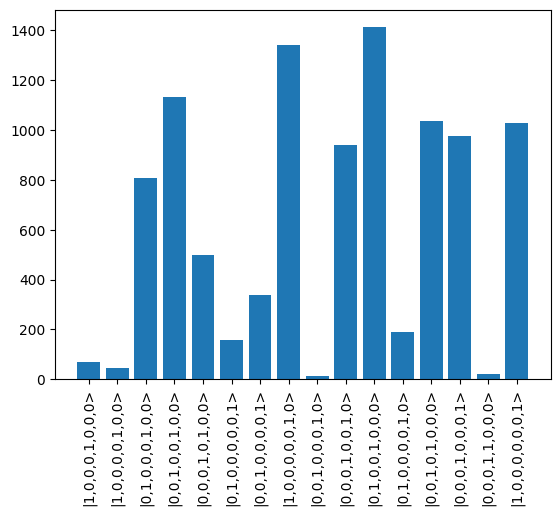

In [ ]:
sample_count=sampler.sample_count(10000)
print(sample_count['results'])
l = [str(element) for element in (list(sample_count['results'].keys()))]
print(l)
plt.bar(l,sample_count['results'].values())
plt.xticks(rotation=90)

In [11]:
#STEP 1, propagate true_paper_state through dis
def prop_true_state(true_paper_state):
  processor2 = pcvl.Processor("SLOS", dis)
  processor2.with_input(true_paper_state)
  sampler=pcvl.algorithm.Sampler(processor2)
  prob_true = sampler.probs()['results']
  return prob_true
#get the a_hat[i]
a_true=np.array(list(prop_true_state(true_paper_state).values()))

In [ ]:
a_true

array([0.00808378, 0.00402491, 0.08268695, 0.11392475, 0.04936339,
       0.01271475, 0.03192008, 0.13040539, 0.00105372, 0.10095708,
       0.13701448, 0.01758382, 0.10310145, 0.09787924, 0.00180029,
       0.10748592])

In [12]:
#STEP 2
#propagate initial_paper_state through gen and dis
def prop_init_state(initial_paper_state):
  processor1 = pcvl.Processor("SLOS", chip)
  processor1.with_input(initial_paper_state)
  sampler=pcvl.algorithm.Sampler(processor1)
  prob_init = sampler.probs()['results']
  return prob_init

a_init=np.array(list(prop_init_state(initial_paper_state).values()))

In [ ]:
a_init

array([0.02183227, 0.02890879, 0.10074583, 0.11416176, 0.01326014,
       0.0658455 , 0.05082452, 0.11754877, 0.11647435, 0.06975955,
       0.01186716, 0.00023319, 0.06086886, 0.00279661, 0.03877136,
       0.18610133])

In [13]:
#STEP 3
def loss_function(a_true,a_init):
  sum=0
  for i in range(len(a_true)):
   sum=sum+np.sum((a_true[i]-a_init[i]))**2
  loss=np.tanh(sum)
  #print("sum=",sum)
  return loss

In [14]:
#define the finite difference solver
def dis_finite_difference_solver(params,h,a_true): #params is a dict
  a_true_updated=a_true
  diff=[]
  finitedifferenceparams=params.copy()
  for i in range(1,13):
    lossfunctionholder=loss_function(a_true,a_init)
    a_true=a_true_updated
    finitedifferenceparams[f'dis_theta_{i}']=params[f'dis_theta_{i}']+h
    dis.assign(finitedifferenceparams)
    processor2 = pcvl.Processor("SLOS", dis)
    processor2.with_input(true_paper_state)
    sampler=pcvl.algorithm.Sampler(processor2)
    prob_true = sampler.probs()['results']
    a_true_updated=np.array(list(prob_true.values()))
    diff.append((loss_function(a_true_updated,a_init)-lossfunctionholder)/h)
  for i in range(1,13):
    lossfunctionholder=loss_function(a_true,a_init)
    a_true=a_true_updated
    finitedifferenceparams[f'dis_phi_{i}']=params[f'dis_phi_{i}']+h
    dis.assign(finitedifferenceparams)
    processor2 = pcvl.Processor("SLOS", dis)
    processor2.with_input(true_paper_state)
    sampler=pcvl.algorithm.Sampler(processor2)
    prob_true = sampler.probs()['results']
    a_true_updated=np.array(list(prob_true.values()))
    diff.append((loss_function(a_true_updated,a_init)-lossfunctionholder)/h)
  #at the end of this loop, we should have a list of finite-difference gradients calculated individually

  #now we interleave them
  newdiff=[]
  for i in range(len(diff)//2):
    newdiff.append(diff[i])
    newdiff.append(diff[i+12])

  return newdiff


In [ ]:
#disdiff=dis_finite_difference_solver(disparams,0.00001,a_true)

In [15]:
#define the finite difference solver
def chip_finite_difference_solver(params,h,a_init): #params is a dict
  a_init_updated=a_init
  diff=[]
  finitedifferenceparams=params.copy()
  for i in range(1,25):
    lossfunctionholder=loss_function(a_true,a_init)
    a_init=a_init_updated
    finitedifferenceparams[f'gen_phi_{i}']=params[f'gen_phi_{i}']+h
    gen.assign(finitedifferenceparams)
    processor1 = pcvl.Processor("SLOS", chip)
    processor1.with_input(initial_paper_state)
    sampler=pcvl.algorithm.Sampler(processor1)
    prob_init = sampler.probs()['results']
    a_init_updated=np.array(list(prob_init.values()))
    diff.append((loss_function(a_true,a_init_updated)-lossfunctionholder)/h)
  for i in range(1,21):
    lossfunctionholder=loss_function(a_init,a_init)
    a_init=a_init_updated
    finitedifferenceparams[f'gen_theta_{i}']=params[f'gen_theta_{i}']+h
    gen.assign(finitedifferenceparams)
    processor1 = pcvl.Processor("SLOS", chip)
    processor1.with_input(initial_paper_state)
    sampler=pcvl.algorithm.Sampler(processor1)
    prob_init = sampler.probs()['results']
    a_init_updated=np.array(list(prob_init.values()))
    diff.append((loss_function(a_true,a_init_updated)-lossfunctionholder)/h)
  #at the end of this loop, we should have a list of finite-difference gradients calculated individually

  return diff


In [ ]:
#gendiff=chip_finite_difference_solver(genparams,0.00001,a_init)

In [16]:
def SGD_ascent(params,epoch,eta):
  test_copy = params.copy()
  for i in range(epoch):
    disdiff=dis_finite_difference_solver(disparams,0.00001,a_true)
    for key, value in zip(test_copy.keys(), disdiff):
        test_copy[key] += 1+eta*value
        test_copy[key] %= 2*np.pi
  return test_copy

In [17]:
def SGD_descent(params,epoch,eta):
  test_copy = params.copy()
  for i in range(epoch):
    gendiff=chip_finite_difference_solver(genparams,0.00001,a_init)
    print(gendiff)
    for key, value in zip(test_copy.keys(), gendiff):
        test_copy[key] -= 1+eta*value
        test_copy[key] %= 2*np.pi
  return test_copy

In [ ]:
#new_dis_params = SGD_ascent(disparams,10,0.0001)
#print(new_dis_params)

In [ ]:
#new_gen_params = SGD_descent(genparams,10,0.0001)
#print(new_gen_params)

In [18]:
#STEP 4
#maximize the loss function
#we are maximizing the loss function of the TRUE state when pushed through the discriminator
def discrimination(num_epochs,disparams):
  for i in range(num_epochs):
    temp=disparams.copy()
    a_true=prop_true_state(true_paper_state)
    a_init=prop_init_state(initial_paper_state)
    print("here")
    #assign new parameters to dis
    disparams=SGD_ascent(temp,num_epochs,0.1)
    dis.assign(disparams)
  return np.array(list(a_true))

In [19]:
#step 5
#minimize the loss function
def generation_and_discrimination(num_epochs,genparams):
  for i in range(num_epochs):
    temp=genparams.copy()
    a_true=prop_true_state(true_paper_state)
    a_init=prop_init_state(initial_paper_state)
    #assign new parameters to dis
    print("now generating")
    genparams=SGD_descent(temp,num_epochs,0.1)
    gen.assign(genparams)
  return np.array(list(a_init))

In [20]:
lossholder=[]
for i in range(3):
  a_true=discrimination(10,disparams)
  print("done discriminating")
  a_init=generation_and_discrimination(10,genparams)
  print(loss_function(a_true,a_init))
  lossholder.append(loss_function(a_true,a_init))

here
here
here
here
here
here
here
here
here
here
done discriminating
now generating
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99999999999, 99999.99

Text(0, 0.5, 'loss')

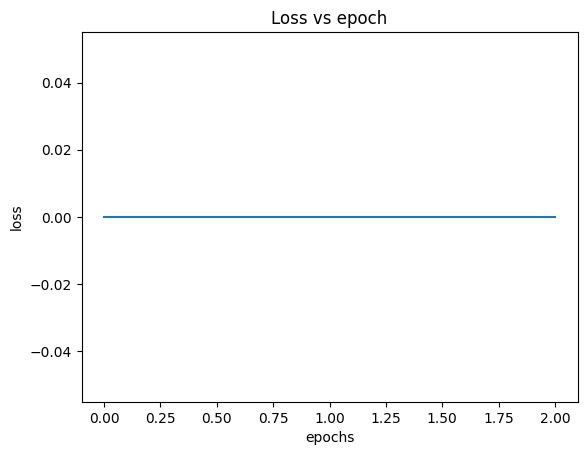

In [21]:
plt.plot(lossholder)
plt.title('Loss vs epoch')
plt.xlabel('epochs')
plt.ylabel('loss')

In [23]:
def fidelity():
  sum = 0
  sampler = pcvl.algorithm.Sampler(processor1)
  pdf = np.array(list(sampler.probs()['results'].values()))

  for i in range(len(pdf)):
    sum += pdf[i] * pdf [i]
  print(np.sqrt(sum))
  return np.sqrt(sum)
gen.assign(genparams)
dis.assign(disparams)
chip=pcvl.Circuit(8,name="Chip").add(0,gen).add(0,dis)
processor1 = pcvl.Processor("SLOS", chip)
processor1.with_input(initial_paper_state)
sampler=pcvl.algorithm.Sampler(processor1)
fidelity()


0.2889078868543323


0.2889078868543323

In [22]:
lossholder

[0.0, 0.0, 0.0]

In [ ]:
import numpy as np

# Define a column vector as the feature matrix
X = np.array([[1], [2], [3], [4]])

# Add a column of 1s for the bias term
X_with_bias = np.c_[np.ones(len(X)), X]

# Define the target variable
y = np.array([2, 4, 5, 4])

# Set learning rate and number of epochs
learning_rate = 0.01
epochs = 1000

# Initialize weights and bias
num_features = X_with_bias.shape[1]
weights = np.zeros(num_features)
bias = 0

# Gradient Descent
for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(X_with_bias, weights)

    # Compute gradients
    dw = (1/len(y)) * np.dot(X_with_bias.T, (y_pred - y))
    db = (1/len(y)) * np.sum(y_pred - y)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Compute and print the loss
    cost = np.mean((y_pred - y)**2)
    print(f"Epoch {epoch}, Loss: {cost}")

# Print the final weights and bias
print(f"Final Weights: {weights}")
print(f"Final Bias: {bias}")


Epoch 0, Loss: 15.25
Epoch 1, Loss: 12.966921875
Epoch 2, Loss: 11.04901667578125
Epoch 3, Loss: 9.437845145443701
Epoch 4, Loss: 8.084320254699389
Epoch 5, Loss: 6.947210533673335
Epoch 6, Loss: 5.991882920512485
Epoch 7, Loss: 5.189246796128397
Epoch 8, Loss: 4.514867008585034
Epoch 9, Loss: 3.948218843154675
Epoch 10, Loss: 3.4720622220028186
Epoch 11, Loss: 3.0719160527865386
Epoch 12, Loss: 2.735616699001361
Epoch 13, Loss: 2.4529471097924285
Epoch 14, Loss: 2.2153253013599987
Epoch 15, Loss: 2.015542691725529
Epoch 16, Loss: 1.8475443106586096
Epoch 17, Loss: 1.7062441833429818
Epoch 18, Loss: 1.5873702588107517
Epoch 19, Loss: 1.4873341549969228
Epoch 20, Loss: 1.403121748927652
Epoch 21, Loss: 1.3322012761258986
Epoch 22, Loss: 1.272446137175949
Epoch 23, Loss: 1.2220700578111
Epoch 24, Loss: 1.179572625548937
Epoch 25, Loss: 1.1436935422806656
Epoch 26, Loss: 1.113374197971276
Epoch 27, Loss: 1.0877253938487206
Epoch 28, Loss: 1.0660002309588692
Epoch 29, Loss: 1.0475713374554